Batch de imagens: torch.Size([32, 3, 256, 256])
Batch de rótulos: torch.Size([32])
Classes no batch: [3 1 1 1 1 1 1 3 0 1 1 1 3 2 1 2 1 0 3 1 3 2 1 1 0 0 3 1 0 1 1 1]


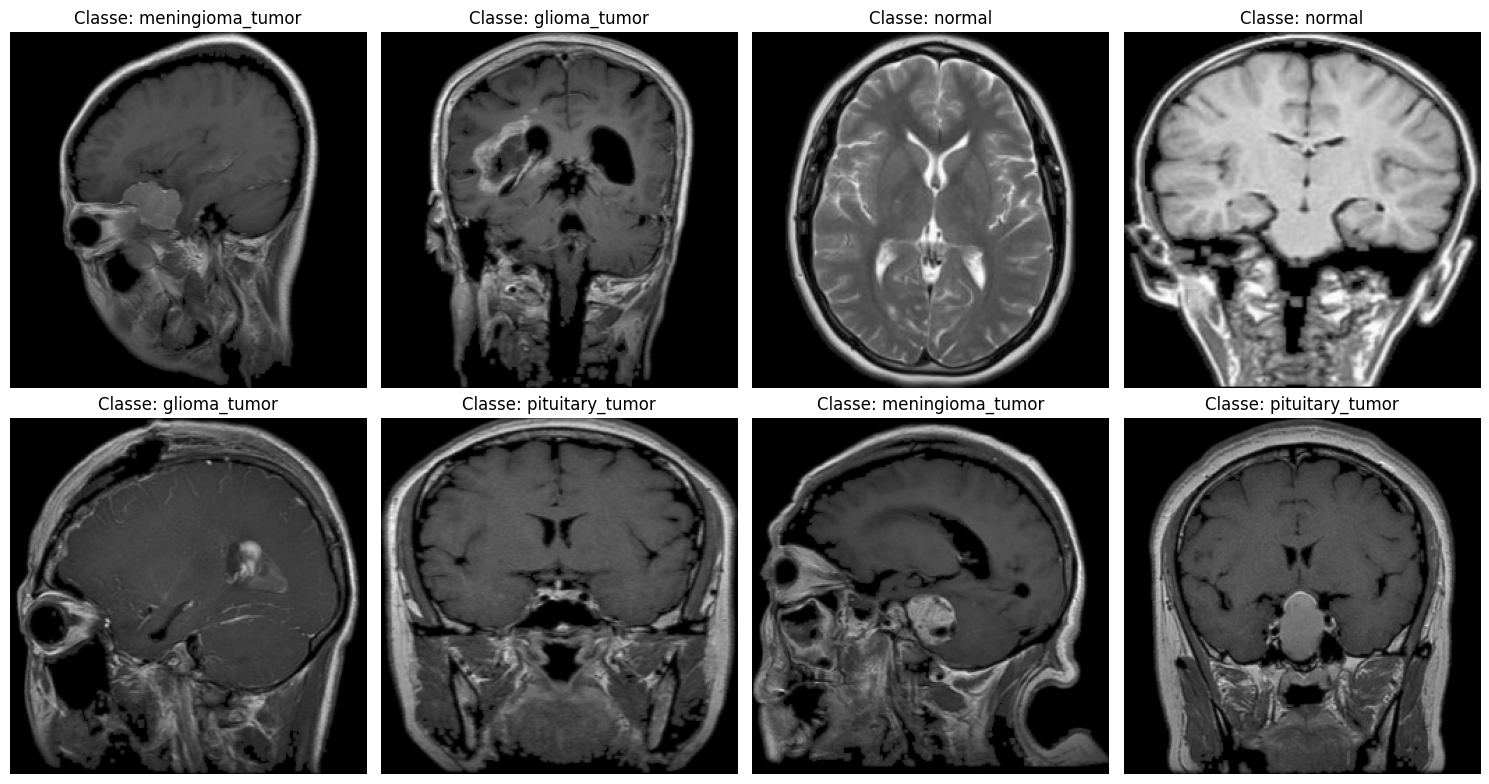

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

class BrainTumorsDataset(Dataset):
    
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']
        self.images = []
        self.labels = []
        
        # Load image paths and labels
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.images.append(img_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        # Load image
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        # Apply transformations if exist
        if self.transform:
            image = self.transform(image)
        
        return image, label

def criar_transformacoes():
    """
    Define as transformações para as imagens
    """
    # Transformações para treino com data augmentation
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    # Transformações para validação sem augmentation
    transform_val = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    return transform_train, transform_val

def criar_dataloaders(root_dir, batch_size=32, num_workers=4):
    """
    Cria os dataloaders para treino e validação
    """
    # Criar transformações
    transform_train, transform_val = criar_transformacoes()
    
    # Criar dataset completo
    dataset = BrainTumorsDataset(root_dir, transform=transform_train)
    
    # Definir tamanhos dos conjuntos
    total_size = len(dataset)
    train_size = int(0.8 * total_size)
    val_size = total_size - train_size
    
    # Dividir em treino e validação
    train_dataset, val_dataset = torch.utils.data.random_split(
        dataset, 
        [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    # Ajustar transformações para o conjunto de validação
    val_dataset.dataset.transform = transform_val
    
    # Criar dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    
    return train_loader, val_loader

def visualizar_grid_imagens(dataset, num_imagens=8):
    # Configurar o grid
    num_rows = 2
    num_cols = num_imagens // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    
    # Selecionar índices aleatórios
    indices = np.random.choice(len(dataset), num_imagens, replace=False)
    
    for idx, ax in zip(indices, axes.flat):
        # Obter imagem e rótulo
        image, label = dataset[idx]
        
        # Se a imagem for um tensor, converter para numpy
        if isinstance(image, torch.Tensor):
            image = image.numpy().transpose(1, 2, 0)
        
        # Plotar imagem
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Classe: {dataset.classes[label]}')
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
if __name__ == "__main__":
    # Caminho para o dataset
    root_dir = '/kaggle/input/brain-tumors-256x256/Data'
    
    # Criar dataloaders
    train_loader, val_loader = criar_dataloaders(root_dir)
    
    # Verificar as dimensões e rótulos
    for images, labels in train_loader:
        print("Batch de imagens:", images.shape)
        print("Batch de rótulos:", labels.shape)
        print("Classes no batch:", labels.numpy())
        break  # Apenas para exemplo
        
    transform = transforms.Compose([
        transforms.Resize((256, 256))
    ])

    dataset = BrainTumorsDataset(root_dir, transform=transform)
    visualizar_grid_imagens(dataset)


Treinando Feature Extractor...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 184MB/s]  



Época 1/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Train Loss: 0.8390 Acc: 0.6591
Val Loss: 0.5920 Acc: 0.7774

Época 2/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]


Train Loss: 0.5970 Acc: 0.7706
Val Loss: 0.5324 Acc: 0.8177

Época 3/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


Train Loss: 0.5574 Acc: 0.7815
Val Loss: 0.5157 Acc: 0.8177

Época 4/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Train Loss: 0.5375 Acc: 0.7888
Val Loss: 0.4846 Acc: 0.8177

Época 5/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Train Loss: 0.5001 Acc: 0.8029
Val Loss: 0.4612 Acc: 0.8290

Época 6/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]


Train Loss: 0.4844 Acc: 0.8090
Val Loss: 0.4903 Acc: 0.8016

Época 7/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


Train Loss: 0.4831 Acc: 0.8130
Val Loss: 0.4680 Acc: 0.8145

Época 8/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.72it/s]


Train Loss: 0.4808 Acc: 0.8166
Val Loss: 0.4508 Acc: 0.8387

Época 9/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


Train Loss: 0.4514 Acc: 0.8235
Val Loss: 0.5036 Acc: 0.8048

Época 10/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.49it/s]


Train Loss: 0.4607 Acc: 0.8130
Val Loss: 0.4312 Acc: 0.8435

Época 11/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.33it/s]


Train Loss: 0.4375 Acc: 0.8255
Val Loss: 0.4207 Acc: 0.8452

Época 12/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]


Train Loss: 0.4396 Acc: 0.8296
Val Loss: 0.4147 Acc: 0.8484

Época 13/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.46it/s]


Train Loss: 0.4360 Acc: 0.8352
Val Loss: 0.4003 Acc: 0.8419

Época 14/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


Train Loss: 0.4121 Acc: 0.8449
Val Loss: 0.4201 Acc: 0.8371

Época 15/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.35it/s]


Train Loss: 0.4008 Acc: 0.8409
Val Loss: 0.4049 Acc: 0.8468

Melhor acurácia do Feature Extractor: 0.8484


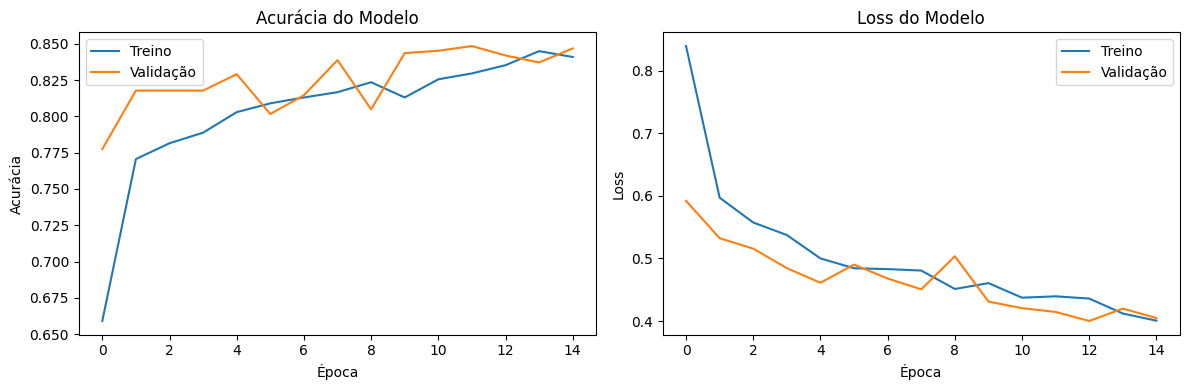


Relatório de Classificação:
                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.82      0.86       181
meningioma_tumor       0.78      0.73      0.76       162
          normal       0.96      0.87      0.91        99
 pituitary_tumor       0.80      0.96      0.87       178

        accuracy                           0.85       620
       macro avg       0.86      0.85      0.85       620
    weighted avg       0.85      0.85      0.85       620



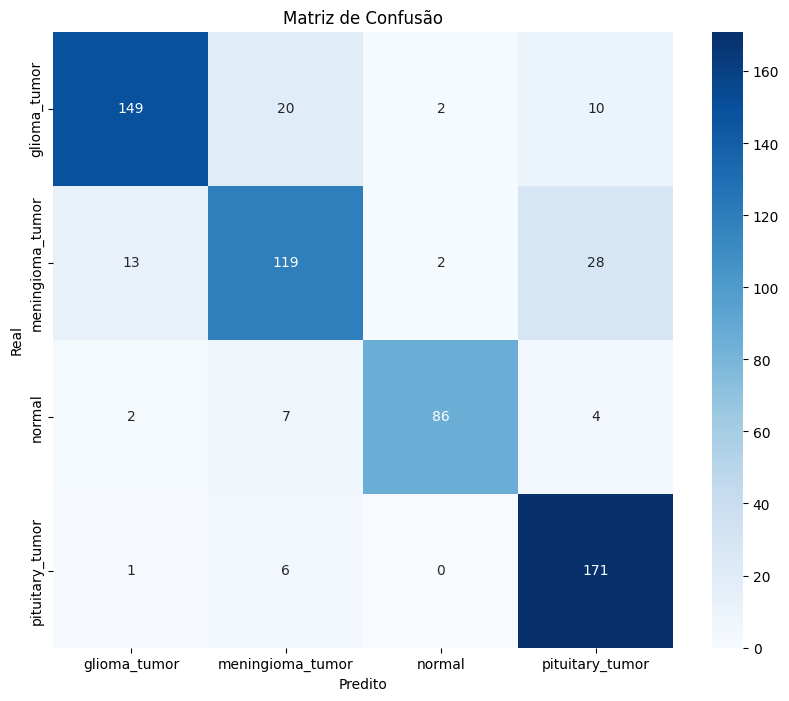


Treinando modelo com Fine-tuning...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Época 1/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]


Train Loss: 0.8224 Acc: 0.6474
Val Loss: 0.4637 Acc: 0.8081

Época 2/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.34it/s]


Train Loss: 0.4343 Acc: 0.8441
Val Loss: 0.3776 Acc: 0.8548

Época 3/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]


Train Loss: 0.2842 Acc: 0.9107
Val Loss: 0.3004 Acc: 0.8823

Época 4/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


Train Loss: 0.1417 Acc: 0.9519
Val Loss: 0.2200 Acc: 0.9387

Época 5/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]


Train Loss: 0.0776 Acc: 0.9750
Val Loss: 0.2204 Acc: 0.9435

Época 6/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]


Train Loss: 0.0943 Acc: 0.9737
Val Loss: 0.3114 Acc: 0.8855

Época 7/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]


Train Loss: 0.1704 Acc: 0.9467
Val Loss: 0.2829 Acc: 0.9048

Época 8/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


Train Loss: 0.1273 Acc: 0.9645
Val Loss: 0.1602 Acc: 0.9565

Época 9/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


Train Loss: 0.0417 Acc: 0.9875
Val Loss: 0.2586 Acc: 0.9419

Época 10/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


Train Loss: 0.0320 Acc: 0.9891
Val Loss: 0.4027 Acc: 0.8968

Época 11/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.45it/s]


Train Loss: 0.0493 Acc: 0.9838
Val Loss: 0.4252 Acc: 0.8677

Época 12/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]


Train Loss: 0.0325 Acc: 0.9911
Val Loss: 0.2508 Acc: 0.9290

Época 13/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.46it/s]


Train Loss: 0.0404 Acc: 0.9891
Val Loss: 0.2175 Acc: 0.9484

Época 14/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


Train Loss: 0.0023 Acc: 0.9992
Val Loss: 0.2304 Acc: 0.9597

Época 15/15


Validation: 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]


Train Loss: 0.0002 Acc: 1.0000
Val Loss: 0.2510 Acc: 0.9565

Melhor acurácia do Fine-tuning: 0.9597


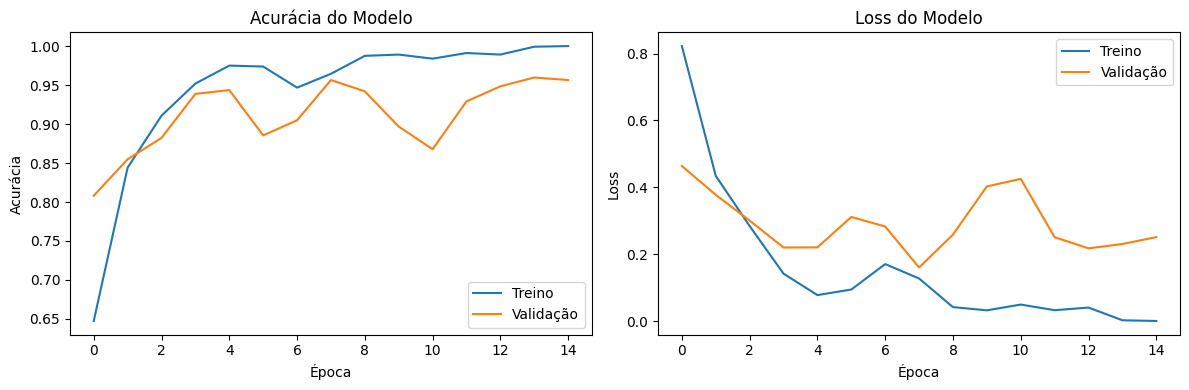


Relatório de Classificação:
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.96      0.95       181
meningioma_tumor       0.95      0.94      0.95       162
          normal       0.95      0.94      0.94        99
 pituitary_tumor       0.98      0.98      0.98       178

        accuracy                           0.96       620
       macro avg       0.96      0.95      0.95       620
    weighted avg       0.96      0.96      0.96       620



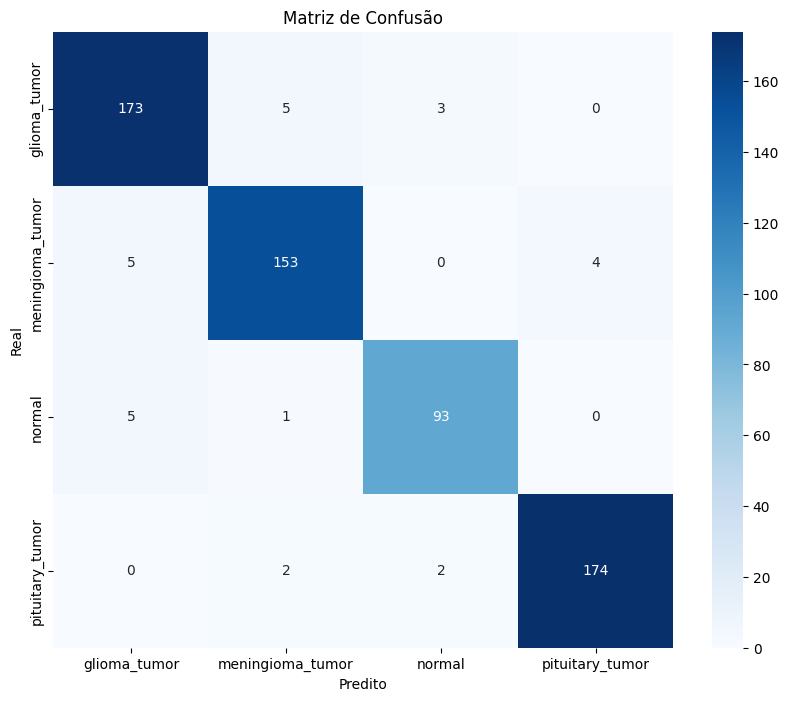

In [3]:
BATCH_SIZE = 32
NUM_EPOCHS = 15
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMG_SIZE = 256  # Mantendo a resolução original das imagens
NUM_CLASSES = 4  
CLASSES = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
import os


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Carregar VGG16 pré-treinado
        vgg16 = models.vgg16(pretrained=True)
        
        # Congelar todos os parâmetros
        for param in vgg16.parameters():
            param.requires_grad = False
            
        num_features = vgg16.classifier[6].in_features
        features = list(vgg16.classifier.children())[:-1]
        features.extend([
            nn.Linear(num_features, NUM_CLASSES),
            #nn.ReLU(inplace=True),
            #nn.Dropout(0.5),
            #nn.Linear(512, NUM_CLASSES)
        ])
        vgg16.classifier = nn.Sequential(*features)
        
        self.model = vgg16
        
    def forward(self, x):
        return self.model(x)

class FineTuningModel(nn.Module):
    def __init__(self):
        super(FineTuningModel, self).__init__()
        # Carregar VGG16 pré-treinado
        vgg16 = models.vgg16(pretrained=True)
        
        num_features = vgg16.classifier[6].in_features
        features = list(vgg16.classifier.children())[:-1]
        features.extend([
            nn.Linear(num_features, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, NUM_CLASSES)
        ])
        vgg16.classifier = nn.Sequential(*features)
        
        self.model = vgg16
        
    def forward(self, x):
        return self.model(x)

def treinar_epoca(model, dataloader, criterion, optimizer, device, is_training=True):
    running_loss = 0.0
    running_corrects = 0
    
    if is_training:
        model.train()
    else:
        model.eval()
    
    for inputs, labels in tqdm(dataloader, desc='Training' if is_training else 'Validation'):
        inputs, labels = inputs.to(device), labels.to(device)
        
        if is_training:
            optimizer.zero_grad()
            
        with torch.set_grad_enabled(is_training):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            if is_training:
                loss.backward()
                optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

def treinar_modelo(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_acc = 0.0
    best_model_wts = None
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'\nÉpoca {epoch+1}/{num_epochs}')
        
        # Treino
        train_loss, train_acc = treinar_epoca(
            model, train_loader, criterion, optimizer, device, is_training=True
        )
        
        # Validação
        val_loss, val_acc = treinar_epoca(
            model, val_loader, criterion, optimizer, device, is_training=False
        )
        
        # Salvar melhor modelo
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict().copy()
        
        # Registrar métricas
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.item())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        
        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
    
    # Restaurar melhor modelo
    model.load_state_dict(best_model_wts)
    return history, best_acc

def plotar_metricas(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico de acurácia
    ax1.plot(history['train_acc'])
    ax1.plot(history['val_acc'])
    ax1.set_title('Acurácia do Modelo')
    ax1.set_ylabel('Acurácia')
    ax1.set_xlabel('Época')
    ax1.legend(['Treino', 'Validação'])
    
    # Gráfico de loss
    ax2.plot(history['train_loss'])
    ax2.plot(history['val_loss'])
    ax2.set_title('Loss do Modelo')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Época')
    ax2.legend(['Treino', 'Validação'])
    
    plt.tight_layout()
    plt.show()

def avaliar_modelo(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Gerar relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(all_labels, all_preds, target_names=CLASSES))
    
    # Gerar e plotar matriz de confusão
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title('Matriz de Confusão')
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.show()

def main():
    # Caminho para o dataset de animais
    diretorio_dataset = '/kaggle/input/brain-tumors-256x256/Data'
    
    # Carregar dataset
    train_loader, val_loader = criar_dataloaders(diretorio_dataset)
    
    # Configurações de treinamento
    criterion = nn.CrossEntropyLoss()
    
    # 1. Feature Extractor
    print("\nTreinando Feature Extractor...")
    feature_extractor = FeatureExtractor().to(DEVICE)
    optimizer_fe = optim.Adam(feature_extractor.parameters(), lr=0.001)
    
    history_fe, best_acc_fe = treinar_modelo(
        feature_extractor,
        train_loader,
        val_loader,
        criterion,
        optimizer_fe,
        NUM_EPOCHS,
        DEVICE
    )
    
    print(f"\nMelhor acurácia do Feature Extractor: {best_acc_fe:.4f}")
    plotar_metricas(history_fe)
    avaliar_modelo(feature_extractor, val_loader, DEVICE)
    
    # 2. Fine-tuning
    print("\nTreinando modelo com Fine-tuning...")
    fine_tuning_model = FineTuningModel().to(DEVICE)
    optimizer_ft = optim.Adam(fine_tuning_model.parameters(), lr=0.0001)
    
    history_ft, best_acc_ft = treinar_modelo(
        fine_tuning_model,
        train_loader,
        val_loader,
        criterion,
        optimizer_ft,
        NUM_EPOCHS,
        DEVICE
    )
    
    print(f"\nMelhor acurácia do Fine-tuning: {best_acc_ft:.4f}")
    plotar_metricas(history_ft)
    avaliar_modelo(fine_tuning_model, val_loader, DEVICE)

if __name__ == "__main__":
    main()